In [1]:
import pandas as pd

# Load the CSV data into a DataFrame
imd_data = pd.read_csv('IMD.csv')

# Group the data by 'Local Authority District name (2019)' and calculate the mean for each column
grouped_data = imd_data.groupby('code').agg({
    'IMD': 'mean',
    'Income': 'mean',
    'Employment': 'mean',
    'Education_Skills_Training': 'mean',
    'HealthDeprivation_Disability': 'mean',
    'Crime': 'mean',
    'Housing_Services_Barriers': 'mean',
    'Living_Environment': 'mean'
}).reset_index()

# Rename the columns for clarity
grouped_data.columns = ['Code', 'IMD', 'Income', 'Employment', 'Education', 'Disability', 'Crime', 'Service', 'Environment']

# Print the aggregated data
print(grouped_data)

# Write the aggregated data to a new CSV file
output_file = 'aggregated_imd_data.csv'
grouped_data.to_csv(output_file, index=False)  # Set index=False to exclude the index column
print(f"Aggregated data saved to {output_file}")








<jemalloc>: MADV_DONTNEED does not work (memset will be used instead)
<jemalloc>: (This is the expected behaviour if you are running under QEMU)


         Code           IMD        Income    Employment     Education  \
0   E09000001  20792.750000  21817.750000  21717.000000  26107.500000   
1   E09000002   7280.299065   7692.345794  10644.121495  10909.018692   
2   E09000003  19334.177033  17078.057416  19971.406699  25080.157895   
3   E09000004  19758.365517  18658.434483  19822.455172  16017.986207   
4   E09000005  12141.885542  11600.084337  15422.602410  18884.439759   
5   E09000006  21821.896373  20974.709845  21948.326425  23138.284974   
6   E09000007  16247.744361  14359.135338  16855.240602  22651.526316   
7   E09000008  14980.986301  14740.374429  16624.027397  18771.853881   
8   E09000009  14076.575130  13524.160622  16225.150259  20977.010363   
9   E09000010  12875.651685  11380.140449  14750.286517  16418.837079   
10  E09000011  12299.131783  11281.472868  13152.581395  17825.620155   
11  E09000012   7393.562500   7605.750000  10843.773438  18836.585938   
12  E09000013  14201.363636  13775.581818  15834.79

In [2]:
import numpy as np
import statsmodels.api as sm
pd.set_option('display.max_rows', 200)
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.cluster import DBSCAN
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LinearRegression
#pd.options.display.float_format = '{:40,.4f}'.format # specifies default number form 
plt.style.use('ggplot') # specifies that graphs should use ggplot styling 
%matplotlib inline

# 从 population.csv 文件加载数据
data = pd.read_csv('population.csv')
data = data.dropna()
data

,code,borough,No,population,toilets_No,toilets_per_1000_pop,borough_IMD,Income,Employment,Education,Disability,Crime,Service,Environment
0,E09000001,City of London,1,9721,111,11.418578,20792.750000,21817.750000,21717.00000,26107.50000,24331.25000,31468.250000,5850.000000,8587.000000
1,E09000002,Barking and Dagenham,2,212906,18,0.084544,7280.299065,7692.345794,10644.12150,10909.01869,13098.08411,9260.214953,1248.364486,9840.728972
2,E09000003,Barnet,3,395869,39,0.098517,19334.177030,17078.057420,19971.40670,25080.15789,27845.24880,15386.918660,7710.531100,12837.492820
3,E09000004,Bexley,4,248287,42,0.169159,19758.365520,18658.434480,19822.45517,16017.98621,23565.18621,18570.351720,12522.248280,15903.972410
4,E09000005,Brent,5,329771,36,0.109167,12141.885540,11600.084340,15422.60241,18884.43976,22311.98795,11075.777110,2320.313253,10268.909640
5,E09000006,Bromley,6,332336,97,0.291873,21821.896370,20974.709840,21948.32642,23138.28497,26437.56995,17082.119170,10026.606220,17260.518130
6,E09000007,Camden,7,270029,77,0.285155,16247.744360,14359.135340,16855.24060,22651.52632,22073.94737,12468.406020,15142.849620,8001.526316
7,E09000008,Croydon,8,386710,64,0.165499,14980.986300,14740.374430,16624.02740,18771.85388,18748.11872,13158.917810,6042.333333,12883.063930
8,E09000009,Ealing,9,341806,33,0.096546,14076.575130,13524.160620,16225.15026,20977.01036,20598.94301,13500.419690,5005.974093,9124.056995
9,E09000010,Enfield,10,333794,41,0.122830,12875.651690,11380.140450,14750.28652,16418.83708,23095.93820,13895.258430,3588.730337,10919.044940


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   code                  33 non-null     object 
 1   borough               33 non-null     object 
 2   No                    33 non-null     int64  
 3   population            33 non-null     int64  
 4   toilets_No            33 non-null     int64  
 5   toilets_per_1000_pop  33 non-null     float64
 6   borough_IMD           33 non-null     float64
 7   Income                33 non-null     float64
 8   Employment            33 non-null     float64
 9   Education             33 non-null     float64
 10  Disability            33 non-null     float64
 11  Crime                 33 non-null     float64
 12  Service               33 non-null     float64
 13  Environment           33 non-null     float64
dtypes: float64(9), int64(3), object(2)
memory usage: 3.7+ KB


In [4]:
data.isnull().sum()

code                    0
borough                 0
No                      0
population              0
toilets_No              0
toilets_per_1000_pop    0
borough_IMD             0
Income                  0
Employment              0
Education               0
Disability              0
Crime                   0
Service                 0
Environment             0
dtype: int64

In [5]:
data.toilets_per_1000_pop.describe()

count    33.000000
mean      0.517568
std       1.959559
min       0.056915
25%       0.111394
50%       0.145245
75%       0.213009
max      11.418578
Name: toilets_per_1000_pop, dtype: float64

In [6]:
data1 = data.drop(['code','borough','No','population','toilets_No'], axis=1)
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   toilets_per_1000_pop  33 non-null     float64
 1   borough_IMD           33 non-null     float64
 2   Income                33 non-null     float64
 3   Employment            33 non-null     float64
 4   Education             33 non-null     float64
 5   Disability            33 non-null     float64
 6   Crime                 33 non-null     float64
 7   Service               33 non-null     float64
 8   Environment           33 non-null     float64
dtypes: float64(9)
memory usage: 2.4 KB


In [7]:
data2 = data1[data1['toilets_per_1000_pop']<1]
data2

,toilets_per_1000_pop,borough_IMD,Income,Employment,Education,Disability,Crime,Service,Environment
1,0.084544,7280.299065,7692.345794,10644.12150,10909.01869,13098.08411,9260.214953,1248.364486,9840.728972
2,0.098517,19334.177030,17078.057420,19971.40670,25080.15789,27845.24880,15386.918660,7710.531100,12837.492820
3,0.169159,19758.365520,18658.434480,19822.45517,16017.98621,23565.18621,18570.351720,12522.248280,15903.972410
4,0.109167,12141.885540,11600.084340,15422.60241,18884.43976,22311.98795,11075.777110,2320.313253,10268.909640
5,0.291873,21821.896370,20974.709840,21948.32642,23138.28497,26437.56995,17082.119170,10026.606220,17260.518130
6,0.285155,16247.744360,14359.135340,16855.24060,22651.52632,22073.94737,12468.406020,15142.849620,8001.526316
7,0.165499,14980.986300,14740.374430,16624.02740,18771.85388,18748.11872,13158.917810,6042.333333,12883.063930
8,0.096546,14076.575130,13524.160620,16225.15026,20977.01036,20598.94301,13500.419690,5005.974093,9124.056995
9,0.122830,12875.651690,11380.140450,14750.28652,16418.83708,23095.93820,13895.258430,3588.730337,10919.044940
10,0.128498,12299.131780,11281.472870,13152.58140,17825.62016,16307.78295,9956.178295,7308.503876,12447.426360


Text(0.5, 1.0, 'Correlation Matrix')

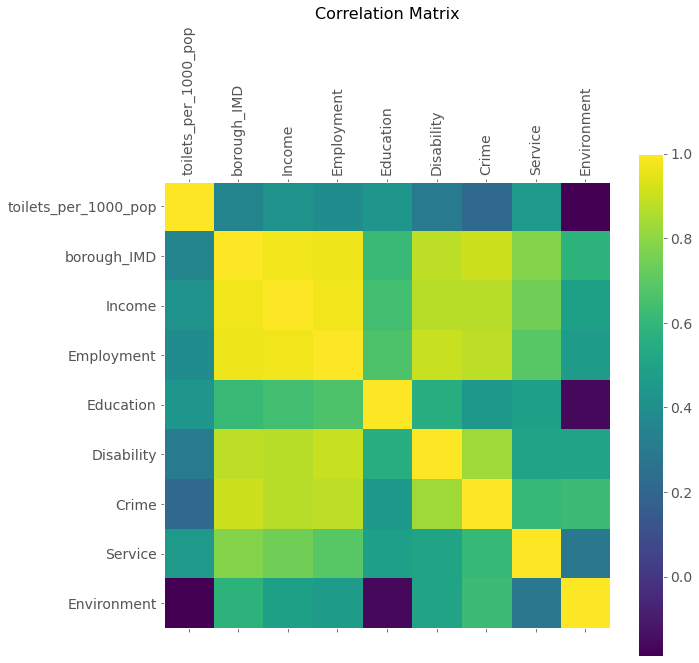

In [8]:
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(10, 9))
plt.matshow(data2.corr(), fignum=f.number)
plt.xticks(range(data2.shape[1]), data2.columns, fontsize=14, rotation=90)
plt.yticks(range(data2.shape[1]), data2.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

In [9]:
multi_regression_model = smf.ols(formula='toilets_per_1000_pop ~ Education+Disability+Crime+Service+Environment',data=data2).fit() 
multi_regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     toilets_per_1000_pop   R-squared:                       0.379
Model:                              OLS   Adj. R-squared:                  0.260
Method:                   Least Squares   F-statistic:                     3.175
Date:                  Sun, 27 Aug 2023   Prob (F-statistic):             0.0228
Time:                          06:09:20   Log-Likelihood:                 35.390
No. Observations:                    32   AIC:                            -58.78
Df Residuals:                        26   BIC:                            -49.99
Df Model:                             5                                         
Covariance Type:              nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.1224      0.108      1.132      0.268      -0.100       0.345
Education   -1.611e-06   6.43e-06     -0.250      0.804   -1.48e-05    1.16e-05
Disability     7.6e-06    6.2e-06      1.225      0.232   -5.15e-06    2.04e-05
Crime       -8.179e-07   9.77e-06     -0.084      0.934   -2.09e-05    1.93e-05
Service      9.836e-06   4.47e-06      2.203      0.037    6.58e-07     1.9e-05
Environment -1.345e-05   7.15e-06     -1.881      0.071   -2.81e-05    1.25e-06
==============================================================================
Omnibus:                       18.639   Durbin-Watson:                   2.332
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.650
Skew:                           1.528   Prob(JB):                     4.44e-06
Kurtosis:                       6.024   Cond. No.                     2.43e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.43e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
# This function is adjusted from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: (default 5) the threshould VIF value. If the VIF of a variable is greater than thresh, it should be removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    vif_values = []  # 创建一个空列表来存储 VIF 值
    while True:
        # adding a constatnt item to the data. add_constant is a function from statsmodels (see the import above)
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # 获取当前循环中的所有 VIF 值，并添加到列表中
        vif_values.append(vif_df['VIF'].tolist())

        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        # If there are multiple variabels with VIF>thresh, only one of them is removed. This is because we want to keep as many variables as possible
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df, vif_values

In [11]:
df_predictors_selected_VIF, vif_values= drop_column_using_vif_(data2.drop('toilets_per_1000_pop', axis=1))
# Note that there is a 'while' loop in the drop_column_using_vif_. In each iteration, one variable is dropped.
print("The columns remaining after VIF selection are:")
print(df_predictors_selected_VIF.columns)
print(vif_values)


Dropping: borough_IMD
Dropping: Employment
Dropping: Income
The columns remaining after VIF selection are:
Index(['Education', 'Disability', 'Crime', 'Service', 'Environment'], dtype='object')
[[224.94591319944695, 34.01085774637569, 47.33090443068972, 8.658457509356806, 8.597172297884864, 8.83204237390212, 13.086585509774864, 13.232429073434515], [26.674928480288706, 31.67982073956338, 3.7878625642256156, 6.479074094356562, 6.154066558013224, 2.698723738060453, 3.169984529326924], [12.337584315201145, 3.49425711071296, 5.56262617182166, 5.724978416637035, 2.693332418761249, 3.1698162831955488], [2.886952272840299, 4.106310744752653, 4.9202246104307275, 1.7771048463769732, 3.0248823551712305]]


In [12]:
def stepwise_selection(X, y, 
                       initial_list=[],
                       threshold_in=0.05, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features
    Always set threshold_in < threshold_out to avoid infinite looping. 
    """
    included = list(initial_list)
    while True:
        changed=False # forward step
        excluded = list(set(X.columns)-set(included)) 
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column] 
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin() 
            included.append(best_feature) 
            changed=True
            if verbose:
                print('Add {:30} with p-value {:.6}'.format(best_feature, best_pval))
    
        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out: 
            changed=True
            #worst_feature = pvalues.argmax() 
            worst_feature = pvalues.idxmax() 
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval)) 
        if not changed:
            break 
    return included

In [13]:
predictors_data = df_predictors_selected_VIF
#predictors_data = data2.drop(columns=['toilets_per_1000_pop'], axis=1) 
response_data = data2[['toilets_per_1000_pop']]

In [14]:
list_predictor_select_stepwise = stepwise_selection(X=predictors_data, y=response_data)
print("The predictors that are selected by stepwise regression are:") 
print(list_predictor_select_stepwise)

Add Service                        with p-value 0.0093137
Add Environment                    with p-value 0.0387658
The predictors that are selected by stepwise regression are:
['Service', 'Environment']


/tmp/ipykernel_70299/1637516988.py:22: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
/tmp/ipykernel_70299/1637516988.py:22: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
/tmp/ipykernel_70299/1637516988.py:22: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


In [20]:
multi_regression_model = smf.ols(formula='toilets_per_1000_pop ~ Service + Environment',data=data2).fit() 
multi_regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     toilets_per_1000_pop   R-squared:                       0.315
Model:                              OLS   Adj. R-squared:                  0.268
Method:                   Least Squares   F-statistic:                     6.680
Date:                  Sun, 27 Aug 2023   Prob (F-statistic):            0.00411
Time:                          06:15:08   Log-Likelihood:                 33.827
No. Observations:                    32   AIC:                            -61.65
Df Residuals:                        29   BIC:                            -57.26
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.1731      0.048      3.630      0.001       0.076       0.271
Service        1.2e-05   3.48e-06      3.447      0.002    4.88e-06    1.91e-05
Environment -9.247e-06   4.27e-06     -2.165      0.039    -1.8e-05   -5.11e-07
==============================================================================
Omnibus:                       17.460   Durbin-Watson:                   2.435
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.388
Skew:                           1.495   Prob(JB):                     2.27e-05
Kurtosis:                       5.664   Cond. No.                     4.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

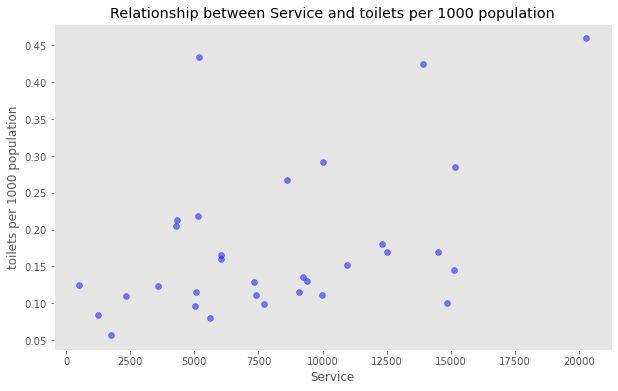

In [21]:
plt.figure(figsize=(10, 6))  # 设置图形大小

# 绘制散点图
plt.scatter(data2['Service'], data2['toilets_per_1000_pop'], color='blue', alpha=0.5)

# 添加标题和标签
plt.title('Relationship between Service and toilets per 1000 population')
plt.xlabel('Service')
plt.ylabel('toilets per 1000 population')

# 显示图形
plt.show()

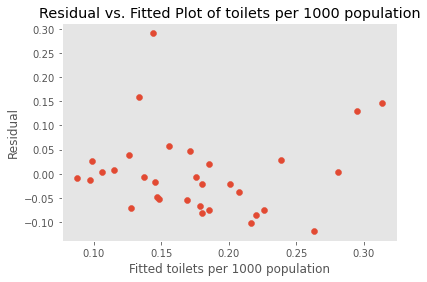

In [22]:
plt.scatter(multi_regression_model.fittedvalues, multi_regression_model.resid)
# adding title and labels
plt.xlabel('Fitted toilets per 1000 population')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot of toilets per 1000 population')
plt.show()

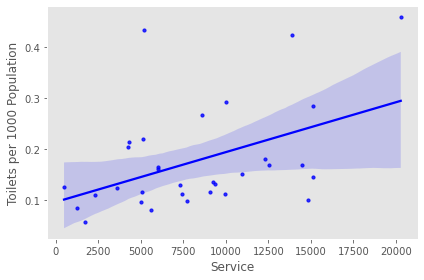

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6, 4))

sns.regplot(x='Service', y='toilets_per_1000_pop', data=data2, scatter_kws={'s': 10}, color='blue')
plt.xlabel('Service', fontsize=12)
plt.ylabel('Toilets per 1000 Population', fontsize=12)

plt.tight_layout()
plt.show()

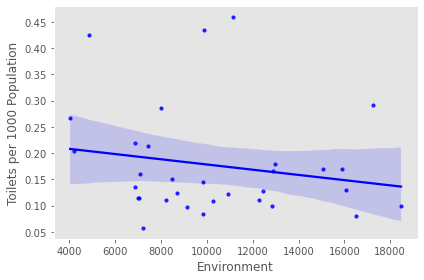

In [25]:
plt.figure(figsize=(6, 4))

sns.regplot(x='Environment', y='toilets_per_1000_pop', data=data2, scatter_kws={'s': 10}, color='blue')
plt.xlabel('Environment', fontsize=12)
plt.ylabel('Toilets per 1000 Population', fontsize=12)

plt.tight_layout()
plt.show()

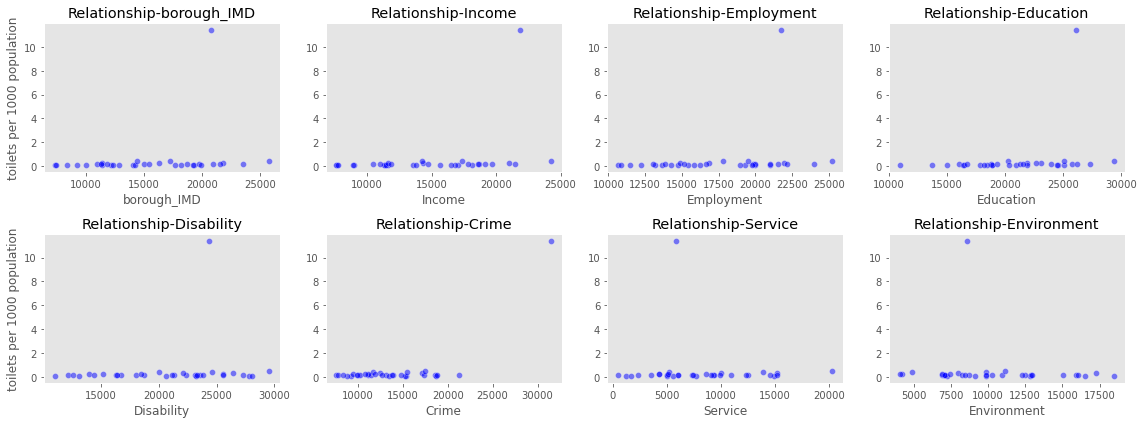

In [19]:
from matplotlib.gridspec import GridSpec

plt.figure(figsize=(16, 6))  # 设置图形大小

# 列名列表
columns = ['borough_IMD', 'Income', 'Employment', 'Education', 'Disability', 'Crime', 'Service', 'Environment']

# 创建一个 GridSpec 对象，将图形分成 2 行 4 列
gs = GridSpec(2, 4)

# 循环绘制散点图
for i in range(8):
    ax = plt.subplot(gs[i // 4, i % 4])  # 创建子图
    sns.scatterplot(x=data[columns[i]], y=data['toilets_per_1000_pop'], color='blue', alpha=0.5, ax=ax)  # 绘制散点图
    ax.set_xlabel(columns[i])  # x 轴标签
    # 仅在第一列显示 y 轴标签
    if i % 4 == 0:
        ax.set_ylabel('toilets per 1000 population')  # y 轴标签
    else:
        ax.set_ylabel('')  # 其他列的 y 轴标签为空字符串
    ax.set_title(f'Relationship-{columns[i]}')  # 图标题

plt.tight_layout()  # 调整子图布局
plt.show()  # 显示图形